# LightGBM

(C) 2018 Dariusz Kajtoch

-----

Demonstration of the [LightGBM](https://github.com/Microsoft/LightGBM) algorithm on the [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).

In [1]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

sns.set_context('notebook')
plt.rcParams['text.usetex'] = False

# Import Data

In [2]:
data = pd.read_csv('./data/abalone.data', 
    names=['Sex','Length','Diameter','Height','Whole_weight',
        'Shicked_weight','Viscera_weight','Shell_weight','Rings'
    ]
)
# create classification data: 
# 1 - Ring number more than 10
# 0 - Ring number less than or equal 10
data['Predict'] = data['Rings'].apply(lambda x: 1 if x>10 else 0)
data.drop('Rings', axis=1, inplace=True)

print(data.head())
print(data.isna().sum())

  Sex  Length  Diameter  Height  Whole_weight  Shicked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Predict  
0         0.150        1  
1         0.070        0  
2         0.210        0  
3         0.155        0  
4         0.055        0  
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shicked_weight    0
Viscera_weight    0
Shell_weight      0
Predict           0
dtype: int64


In [3]:
X = data[[
    'Sex',
    'Length',
    'Diameter',
    'Height',
    'Whole_weight',
    'Shicked_weight',
    'Viscera_weight',
    'Shell_weight'
]]

y = data['Predict']

# code categorical features as integer numbers
X['Sex'] = X['Sex'].map({'M':0, 'F':1, 'I':3})

/opt/intel/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


# Create LightGBM classifier

In [24]:
# training and test data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=0.3, random_state=12, stratify=y )
    
# define classifier
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
    boosting_type='gbdt', # 'dart', 'goss', 'fr'
    num_leaves=5,
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    objective='binary', # 'multiclass'
    subsample=1.,
    min_child_samples=20,
    colsample_bytree=1.,
    reg_alpha=0.,
    reg_lambda=0.,
    random_state=45
)

# fit and observe
clf.fit(X_train, y_train,
    eval_set=[(X_train,y_train),(X_test,y_test)],
    eval_metric=['auc', 'binary_logloss'],
    eval_names=['train', 'test'],
    verbose=True,
    feature_name='auto',
    categorical_feature=['Sex']
)

/opt/intel/intelpython3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/dkajtoch/.local/lib/python3.6/site-packages/lightgbm/basic.py:1042: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['Sex']
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/home/dkajtoch/.local/lib/python3.6/site-packages/lightgbm/basic.py:1042: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['Sex']
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	train's binary_logloss: 0.616155	train's auc: 0.816926	test's binary_logloss: 0.620157	test's auc: 0.785492
[2]	train's binary_logloss: 0.593662	train's auc: 0.841878	test's binary_logloss: 0.600374	test's auc: 0.80081
[3]	train's binary_logloss: 0.573707	train's auc: 0.849192	test's binary_logloss: 0.583289	test's auc: 0.813762
[4]	train's binary_logloss: 0.557159	train's auc: 0.850019	test's binary_logloss: 0.569395	test's auc: 0.812407
[5]	train's binary_logloss: 0.541332	train's auc: 0.862962	test's binary_logloss: 0.556392	test's auc: 0.820678
[6]	train's binary_logloss: 0.529543	train's auc: 0.863131	test's binary_logloss: 0.547494	test's auc: 0.820869
[7]	train's binary_logloss: 0.518008	train's auc: 0.86874	test's binary_logloss: 0.537908	test's auc: 0.825492
[8]	train's binary_logloss: 0.508006	train's auc: 0.86899	test's binary_logloss: 0.530346	test's auc: 0.826487
[9]	train's binary_logloss: 0.499687	train's auc: 0.869394	test's binary_logloss: 0.52452	test's auc: 0.826

[97]	train's binary_logloss: 0.349509	train's auc: 0.923246	test's binary_logloss: 0.461886	test's auc: 0.84362
[98]	train's binary_logloss: 0.348672	train's auc: 0.923761	test's binary_logloss: 0.461922	test's auc: 0.843682
[99]	train's binary_logloss: 0.347433	train's auc: 0.924638	test's binary_logloss: 0.462096	test's auc: 0.843601
[100]	train's binary_logloss: 0.346645	train's auc: 0.925194	test's binary_logloss: 0.46235	test's auc: 0.843423


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=3, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=5, objective='binary', random_state=45,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

# Analyze results

Text(0.5,1,'Feature Importance')

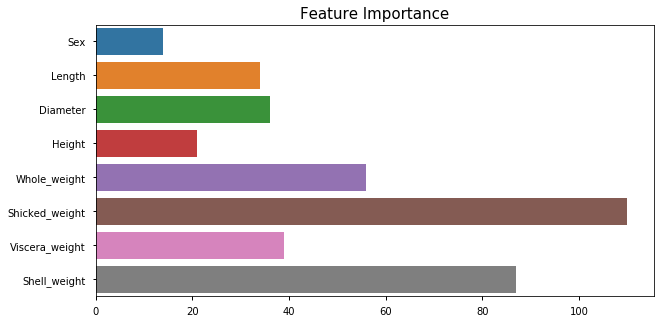

In [26]:
plt.close()

fig, ax  = plt.subplots(figsize=(10,5))

sns.barplot(y=X.columns.tolist(),
            x=clf.feature_importances_,
            orient="h",
            ax=ax
           )

ax.set_title('Feature Importance', fontsize=15)

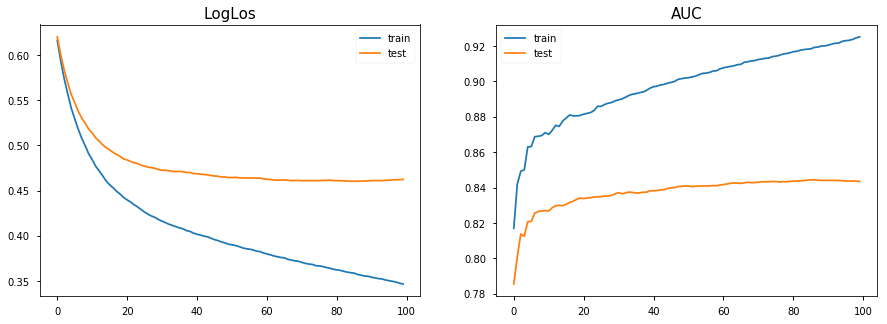

In [27]:
plt.close()

fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=2)

ax[0].plot(clf.evals_result_['train']['binary_logloss'], label='train')
ax[0].plot(clf.evals_result_['test']['binary_logloss'], label='test')
ax[0].set_title('LogLos', fontsize=15)
ax[0].legend()

ax[1].plot(clf.evals_result_['train']['auc'], label='train')
ax[1].plot(clf.evals_result_['test']['auc'], label='test')
ax[1].set_title('AUC', fontsize=15)
ax[1].legend()

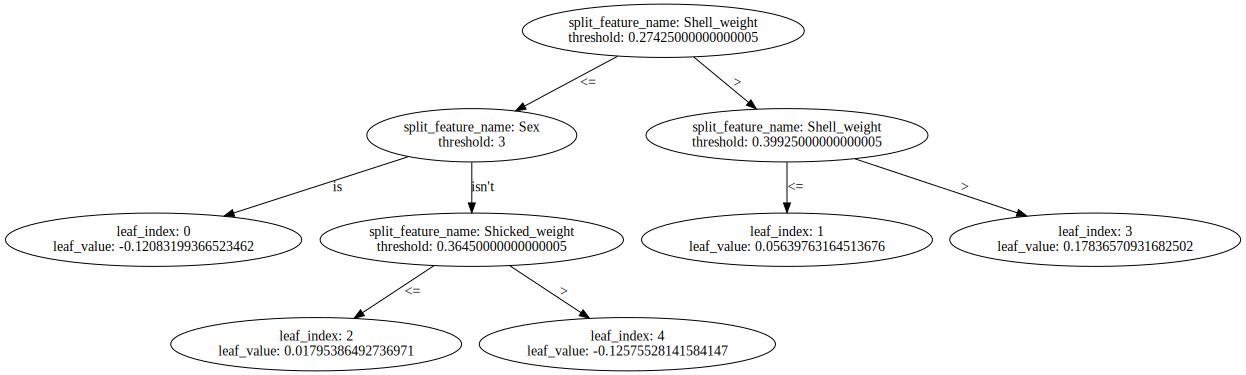

In [25]:
from lightgbm import create_tree_digraph, plot_tree

create_tree_digraph(clf,
    tree_index=1
)